In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas.io.json import json_normalize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
#importing files
ob1_winner = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective1_winner_data.csv")
ob1_loser = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective1_loser_data.csv")
ob2_t1 = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective2_team100.csv")
ob2_t2 = pd.read_csv("C:/Users/Aaron/Desktop/loldfs/objective2_team200.csv")
champId = open("C:/Users/Aaron/Desktop/loldfs/champDic.pkl", "rb")

In [3]:
ob1_winner["gameId"] = ob1_winner["gameId"].map(int)
ob1_winner.info()
ob1_winner.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   teamId           108829 non-null  int64 
 1   win              108829 non-null  object
 2   firstBlood       108829 non-null  bool  
 3   firstTower       108829 non-null  bool  
 4   firstInhibitor   108829 non-null  bool  
 5   firstBaron       108829 non-null  bool  
 6   firstDragon      108829 non-null  bool  
 7   firstRiftHerald  108829 non-null  bool  
 8   gameId           108829 non-null  int64 
dtypes: bool(6), int64(2), object(1)
memory usage: 3.1+ MB


,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,gameId
0,200,Win,False,True,True,False,True,True,4247263043
1,100,Win,False,False,False,False,True,True,4247155821
2,200,Win,True,True,True,False,True,True,4243963257
3,200,Win,True,True,False,False,False,True,4241678498
4,100,Win,True,True,True,True,True,True,4241538868


In [4]:
ob1_loser["win"].fillna("Fail", inplace = True)
ob1_loser["gameId"] = ob1_loser["gameId"].map(int)
ob1_loser.info()
ob1_loser.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   teamId           108829 non-null  int64 
 1   win              108829 non-null  object
 2   firstBlood       108829 non-null  bool  
 3   firstTower       108829 non-null  bool  
 4   firstInhibitor   108829 non-null  bool  
 5   firstBaron       108829 non-null  bool  
 6   firstDragon      108829 non-null  bool  
 7   firstRiftHerald  108829 non-null  bool  
 8   gameId           108829 non-null  int64 
dtypes: bool(6), int64(2), object(1)
memory usage: 3.1+ MB


,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,gameId
0,100,Fail,True,False,False,False,False,False,4247263043
1,200,Fail,True,True,False,False,False,False,4247155821
2,100,Fail,False,False,False,False,False,False,4243963257
3,100,Fail,False,False,False,True,True,False,4241678498
4,200,Fail,False,False,False,False,False,False,4241538868


In [5]:
ob2_t1.info()
ob2_t1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   oc100      92857 non-null  bool 
 1   team100_1  92857 non-null  int64
 2   team100_2  92857 non-null  int64
 3   team100_3  92857 non-null  int64
 4   team100_4  92857 non-null  int64
 5   team100_5  92857 non-null  int64
 6   gameId     92857 non-null  int64
dtypes: bool(1), int64(6)
memory usage: 4.3 MB


,oc100,team100_1,team100_2,team100_3,team100_4,team100_5,gameId
0,False,7,350,266,517,110,4247263043
1,True,236,245,350,110,57,4247155821
2,False,235,60,223,112,58,4243963257
3,False,111,142,236,78,98,4241678498
4,True,145,875,236,34,60,4241538868


In [6]:
ob2_t2.info()
ob2_t2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   oc200      92857 non-null  bool 
 1   team200_1  92857 non-null  int64
 2   team200_2  92857 non-null  int64
 3   team200_3  92857 non-null  int64
 4   team200_4  92857 non-null  int64
 5   team200_5  92857 non-null  int64
 6   gameId     92857 non-null  int64
dtypes: bool(1), int64(6)
memory usage: 4.3 MB


,oc200,team200_1,team200_2,team200_3,team200_4,team200_5,gameId
0,True,235,81,127,84,421,4247263043
1,False,235,126,517,58,15,4247155821
2,True,12,429,7,64,82,4243963257
3,True,875,41,21,154,157,4241678498
4,False,62,2,517,142,350,4241538868


In [7]:
champId = pickle.load(champId)
champId

{'266': ' Aatrox',
 '103': ' Ahri',
 '84': ' Akali',
 '166': ' Akshan',
 '12': ' Alistar',
 '32': ' Amumu',
 '34': ' Anivia',
 '1': ' Annie',
 '523': ' Aphelios',
 '22': ' Ashe',
 '136': ' Aurelion Sol',
 '268': ' Azir',
 '432': ' Bard',
 '53': ' Blitzcrank',
 '63': ' Brand',
 '201': ' Braum',
 '51': ' Caitlyn',
 '164': ' Camille',
 '69': ' Cassiopeia',
 '31': " Cho'Gath",
 '42': ' Corki',
 '122': ' Darius',
 '131': ' Diana',
 '119': ' Draven',
 '36': ' Dr. Mundo',
 '245': ' Ekko',
 '60': ' Elise',
 '28': ' Evelynn',
 '81': ' Ezreal',
 '9': ' Fiddlesticks',
 '114': ' Fiora',
 '105': ' Fizz',
 '3': ' Galio',
 '41': ' Gangplank',
 '86': ' Garen',
 '150': ' Gnar',
 '79': ' Gragas',
 '104': ' Graves',
 '887': ' Gwen',
 '120': ' Hecarim',
 '74': ' Heimerdinger',
 '420': ' Illaoi',
 '39': ' Irelia',
 '427': ' Ivern',
 '40': ' Janna',
 '59': ' Jarvan IV',
 '24': ' Jax',
 '126': ' Jayce',
 '202': ' Jhin',
 '222': ' Jinx',
 '145': " Kai'Sa",
 '429': ' Kalista',
 '43': ' Karma',
 '30': ' Karthus

In [8]:
champIndex = pd.DataFrame.from_dict(champId, orient='index', columns = ["Champ"])
champIndex

,Champ
266,Aatrox
103,Ahri
84,Akali
166,Akshan
12,Alistar
...,...
238,Zed
115,Ziggs
26,Zilean
142,Zoe


In [9]:
#concatenate the 2 teams together
t1 = ob2_t1.rename(columns = {"oc100": "win",
                              "team100_1": "p1",
                              "team100_2": "p2",
                              "team100_3": "p3",
                              "team100_4": "p4", 
                              "team100_5": "p5", 
                              "gameId": "gameId"})
t2 = ob2_t2.rename(columns = {"oc200": "win",
                              "team200_1": "p1",
                              "team200_2": "p2",
                              "team200_3": "p3",
                              "team200_4": "p4", 
                              "team200_5": "p5", 
                              "gameId": "gameId"})

In [10]:
t2.loc[t2["win"] == "Unknown"]

,win,p1,p2,p3,p4,p5,gameId


In [11]:
t2 = t2[t2.win != "Unknown"]

In [12]:
t2["win"].value_counts()

True     46981
False    45876
Name: win, dtype: int64

In [13]:
#encoding the dataset
label_encoder = LabelEncoder()
label_encoder.fit(t1["win"])
t1.win = label_encoder.transform(t1.win)
t1

,win,p1,p2,p3,p4,p5,gameId
0,0,7,350,266,517,110,4247263043
1,1,236,245,350,110,57,4247155821
2,0,235,60,223,112,58,4243963257
3,0,111,142,236,78,98,4241678498
4,1,145,875,236,34,60,4241538868
...,...,...,...,...,...,...,...
92852,0,51,55,30,40,33,4039738326
92853,1,101,64,24,67,267,4170286047
92854,1,412,21,82,30,246,4136207327
92855,1,202,117,24,64,38,4130964458


In [14]:
#encoding the dataset
label_encoder = LabelEncoder()
label_encoder.fit(t2["win"])
t2.win = label_encoder.transform(t2.win)
t2

,win,p1,p2,p3,p4,p5,gameId
0,1,235,81,127,84,421,4247263043
1,0,235,126,517,58,15,4247155821
2,1,12,429,7,64,82,4243963257
3,1,875,41,21,154,157,4241678498
4,0,62,2,517,142,350,4241538868
...,...,...,...,...,...,...,...
92852,1,22,238,154,235,82,4039738326
92853,0,26,516,523,235,245,4170286047
92854,0,8,111,421,516,81,4136207327
92855,0,76,39,157,58,106,4130964458


In [15]:
#add team column to the two df
team100 = []
for i in range(len(t1)):
    team100.append("100")
t1["team"] = np.array(team100)

team200 = []
for i in range(len(t2)):
    team200.append("200")
t2["team"] = np.array(team200)

In [16]:
o2Df = pd.concat([t1, t2])
o2Df

,win,p1,p2,p3,p4,p5,gameId,team
0,0,7,350,266,517,110,4247263043,100
1,1,236,245,350,110,57,4247155821,100
2,0,235,60,223,112,58,4243963257,100
3,0,111,142,236,78,98,4241678498,100
4,1,145,875,236,34,60,4241538868,100
...,...,...,...,...,...,...,...,...
92852,1,22,238,154,235,82,4039738326,200
92853,0,26,516,523,235,245,4170286047,200
92854,0,8,111,421,516,81,4136207327,200
92855,0,76,39,157,58,106,4130964458,200


In [17]:
o2Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185714 entries, 0 to 92856
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   win     185714 non-null  int64 
 1   p1      185714 non-null  int64 
 2   p2      185714 non-null  int64 
 3   p3      185714 non-null  int64 
 4   p4      185714 non-null  int64 
 5   p5      185714 non-null  int64 
 6   gameId  185714 non-null  int64 
 7   team    185714 non-null  object
dtypes: int64(7), object(1)
memory usage: 12.8+ MB


In [18]:
o2Df["win"].value_counts()

1    92857
0    92857
Name: win, dtype: int64

In [19]:
o2Df.reset_index()
o2Df

,win,p1,p2,p3,p4,p5,gameId,team
0,0,7,350,266,517,110,4247263043,100
1,1,236,245,350,110,57,4247155821,100
2,0,235,60,223,112,58,4243963257,100
3,0,111,142,236,78,98,4241678498,100
4,1,145,875,236,34,60,4241538868,100
...,...,...,...,...,...,...,...,...
92852,1,22,238,154,235,82,4039738326,200
92853,0,26,516,523,235,245,4170286047,200
92854,0,8,111,421,516,81,4136207327,200
92855,0,76,39,157,58,106,4130964458,200


In [20]:
#training and testing sets
label = o2Df.drop(["p1", "p2", "p3", "p4", "p5", "gameId", "team"], axis = 1)
feature = o2Df.drop(["win", "gameId", "team"], axis = 1)

ft_train, ft_test, lb_train, lb_test = train_test_split(feature, label, test_size = 0.5, random_state = 42)

In [21]:
#RANDOM FOREST CLASSIFIER

ranFor = RandomForestClassifier()
ranFor.fit(ft_train, lb_train.values.ravel())
rfPred = ranFor.predict(ft_test)

RandomForestAcc = metrics.accuracy_score(lb_test, rfPred)
RandomForestAcc

0.5067900104461699

<AxesSubplot:>

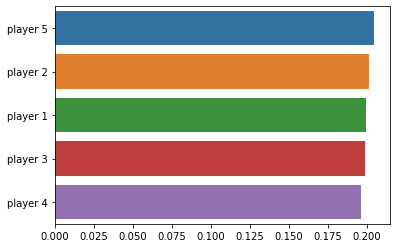

In [22]:
#feature importance
name = ["player 1", "player 2", "player 3", "player 4", "player 5"]
feature_score = pd.Series(ranFor.feature_importances_, index = name).sort_values(ascending = False)
sns.barplot(x = feature_score, y = feature_score.index)

In [23]:
#classification report
print(classification_report(lb_test, rfPred))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52     46426
           1       0.51      0.49      0.50     46431

    accuracy                           0.51     92857
   macro avg       0.51      0.51      0.51     92857
weighted avg       0.51      0.51      0.51     92857



In [24]:
#LOGISTIC REGRESSION

logReg = LogisticRegression(solver = "liblinear")
logReg.fit(ft_train, lb_train.values.ravel())
lrPred = logReg.predict(ft_test)

LogisticRegressionAcc = metrics.accuracy_score(lb_test, rfPred)
LogisticRegressionAcc

0.5067900104461699

In [25]:
#classification report
print(classification_report(lb_test, lrPred))

              precision    recall  f1-score   support

           0       0.50      0.60      0.54     46426
           1       0.50      0.39      0.44     46431

    accuracy                           0.50     92857
   macro avg       0.50      0.50      0.49     92857
weighted avg       0.50      0.50      0.49     92857



In [26]:
#create a smaller training set for SVM
ft_trainX, ft_testX, lb_trainX, lb_testX = train_test_split(feature, label, test_size = 0.9, random_state = 42)

In [27]:
#SUPPORT VECTOR MACHINE

svm = svm.SVC(kernel = "poly")
svm.fit(ft_trainX, lb_trainX.values.ravel())
svmPred = svm.predict(ft_testX)

SupportVectorMachineAcc = metrics.accuracy_score(lb_testX, svmPred)
SupportVectorMachineAcc

0.4996081199930598

In [28]:
#classification report
print(classification_report(lb_testX, svmPred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.10     83667
           1       0.50      0.94      0.65     83476

    accuracy                           0.50    167143
   macro avg       0.50      0.50      0.38    167143
weighted avg       0.50      0.50      0.38    167143



In [29]:
#Naive Bayes

nb = GaussianNB()
nb.fit(ft_train, lb_train.values.ravel())
nbPred = nb.predict(ft_test)

NaiveBayesAcc = metrics.accuracy_score(lb_test, nbPred)
NaiveBayesAcc

0.4982607665550255

In [30]:
#classification report
print(classification_report(lb_test, nbPred))

              precision    recall  f1-score   support

           0       0.50      0.72      0.59     46426
           1       0.50      0.28      0.36     46431

    accuracy                           0.50     92857
   macro avg       0.50      0.50      0.47     92857
weighted avg       0.50      0.50      0.47     92857



Text(0.5, 1.0, 'Elbow Method')

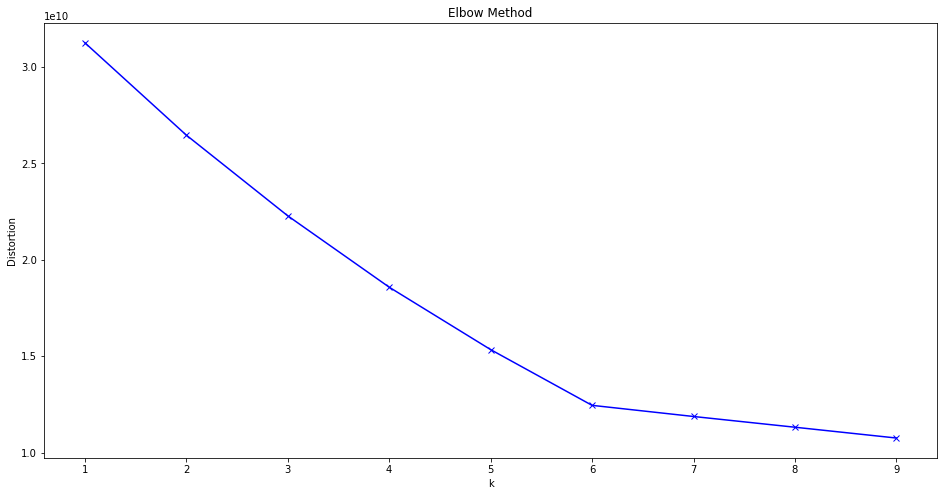

In [31]:
#KNN

#find the k with elbow method
kmeanDF = o2Df.drop(["win", "gameId", "team"], axis = 1)

dist = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(kmeanDF)
    dist.append(kmeanModel.inertia_)

plt.figure(figsize = (16, 8))
plt.plot(K, dist, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("Elbow Method")

In [32]:
#fitting with K

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(ft_train, lb_train.values.ravel())
knnPred = knn.predict(ft_test)

KNearestNeighborsAcc = metrics.accuracy_score(lb_test, knnPred)
KNearestNeighborsAcc

0.5001130770970417

In [33]:
#classification report
print(classification_report(lb_test, knnPred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     46426
           1       0.50      0.50      0.50     46431

    accuracy                           0.50     92857
   macro avg       0.50      0.50      0.50     92857
weighted avg       0.50      0.50      0.50     92857



In [34]:
#Overview of the 5 ML techniques

RF = "{:.2f}".format(RandomForestAcc*100)+"%"
LR = "{:.2f}".format(LogisticRegressionAcc*100)+"%"
SVM = "{:.2f}".format(SupportVectorMachineAcc*100)+"%"
NB = "{:.2f}".format(NaiveBayesAcc*100)+"%"
KNN = "{:.2f}".format(KNearestNeighborsAcc*100)+"%"

print(RF, LR, SVM, NB, KNN)

50.68% 50.68% 49.96% 49.83% 50.01%


In [35]:
#export files
o2Df.to_csv(r"C:/Users/Aaron/Desktop/loldfs/objective2_matches.csv", index = False)
champIndex.to_csv(r"C:/Users/Aaron/Desktop/loldfs/champion_index.csv", index = False)